In [4]:
# -----------------------------------------------
# STEP 1: Import required libraries
# -----------------------------------------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# -----------------------------------------------
# STEP 2: Load the model
# -----------------------------------------------
model_path = "my_model.keras"
model = load_model(model_path)
print("✅ Model loaded successfully!")

# -----------------------------------------------
# STEP 3: Set paths and load label CSV
# -----------------------------------------------
image_dir = "D:\EyeProject\ODIR-5K\ODIR-5K\Testing_Images"
csv_path = "full_df.csv"

df = pd.read_csv(csv_path)

# -----------------------------------------------
# STEP 4: Prepare label map
# -----------------------------------------------
# Some datasets use ['N'], ['D'] etc. You may need to map them to integers
label_mapping = {
    "['N']": 0,  # Normal
    "['D']": 1,  # Diabetes
    "['G']": 2,  # Glaucoma
    "['C']": 3,  # Cataract
    "['A']": 4,  # Age-related Macular Degeneration
    "['H']": 5,  # Hypertension
    "['M']": 6,  # Pathological Myopia
    "['O']": 7   # Other diseases/abnormalities
}
inv_label_mapping = {v: k for k, v in label_mapping.items()}


# Build filename-to-label dictionary
filename_label_map = {}
for idx, row in df.iterrows():
    if row['Left-Fundus'] in os.listdir(image_dir):
        filename_label_map[row['Left-Fundus']] = label_mapping.get(row['labels'], -1)
    if row['Right-Fundus'] in os.listdir(image_dir):
        filename_label_map[row['Right-Fundus']] = label_mapping.get(row['labels'], -1)

# -----------------------------------------------
# STEP 5: Image preprocessing function
# -----------------------------------------------
def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    return img_array

# -----------------------------------------------
# STEP 6: Load and preprocess test images
# -----------------------------------------------
X_test = []
y_true = []
file_names = []

print(f"Loaded {len(X_test)} test images")



for filename, label in filename_label_map.items():
    path = os.path.join(image_dir, filename)
    if os.path.isfile(path):
        try:
            img_array = preprocess_image(path)
            X_test.append(img_array)
            y_true.append(label)
            file_names.append(filename)
        except Exception as e:
            print(f"⚠️ Skipping {filename}: {e}")
    else:
        print(f"❌ File not found: {filename}")


X_test = np.array(X_test)
y_true = np.array(y_true)

# -----------------------------------------------
# STEP 7: Run predictions
# -----------------------------------------------
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# -----------------------------------------------
# STEP 8: Evaluate the model
# -----------------------------------------------
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=inv_label_mapping.values(), yticklabels=inv_label_mapping.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -----------------------------------------------
# STEP 9: Show sample predictions
# -----------------------------------------------
def show_samples(n=5):
    for i in range(n):
        img = X_test[i]
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {inv_label_mapping[y_true[i]]}, Pred: {inv_label_mapping[y_pred[i]]}")
        plt.show()

show_samples(5)


✅ Model loaded successfully!
Loaded 0 test images


c:\Users\sanja\anaconda3\envs\pytorch-gpu\lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


ValueError: math domain error

In [5]:
# Normalize test image filenames
test_image_files = set(f.strip().lower() for f in os.listdir(image_dir))

matched_files = 0
for idx, row in df.iterrows():
    left = str(row['Left-Fundus']).strip().lower()
    right = str(row['Right-Fundus']).strip().lower()
    if left in test_image_files or right in test_image_files:
        matched_files += 1


In [6]:
import os

# Check what's actually inside the test image folder
test_image_files = set(os.listdir(image_dir))
print(f"\n🔎 Found {len(test_image_files)} files in test folder.")

# Check which labels are being used
print("\n📌 First 5 label entries from CSV:")
print(df[['Left-Fundus', 'Right-Fundus', 'labels']].head())

# Check how many images from CSV actually match test images
matched_files = 0
for idx, row in df.iterrows():
    if row['Left-Fundus'] in test_image_files or row['Right-Fundus'] in test_image_files:
        matched_files += 1
print(f"\n✅ Matched {matched_files} filenames from CSV to test images.")



🔎 Found 1000 files in test folder.

📌 First 5 label entries from CSV:
  Left-Fundus Right-Fundus labels
0  0_left.jpg  0_right.jpg  ['N']
1  1_left.jpg  1_right.jpg  ['N']
2  2_left.jpg  2_right.jpg  ['D']
3  4_left.jpg  4_right.jpg  ['D']
4  5_left.jpg  5_right.jpg  ['D']

✅ Matched 0 filenames from CSV to test images.


In [7]:
import os

test_image_samples = list(os.listdir(image_dir))[:10]
print("🖼️ Sample test image filenames:\n", test_image_samples)


🖼️ Sample test image filenames:
 ['1000_left.jpg', '1000_right.jpg', '1001_left.jpg', '1001_right.jpg', '1002_left.jpg', '1002_right.jpg', '1003_left.jpg', '1003_right.jpg', '1004_left.jpg', '1004_right.jpg']


In [8]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# -----------------------------------------------
# STEP 1: Load the trained model
# -----------------------------------------------
model_path = "my_model.keras"
model = load_model(model_path)
print("✅ Model loaded successfully!")

# -----------------------------------------------
# STEP 2: Define class label map
# -----------------------------------------------
class_labels = {
    0: "Normal (N)",
    1: "Diabetes (D)",
    2: "Glaucoma (G)",
    3: "Cataract (C)",
    4: "Age-related Macular Degeneration (A)",
    5: "Hypertension (H)",
    6: "Pathological Myopia (M)",
    7: "Other diseases/abnormalities (O)"
}

# -----------------------------------------------
# STEP 3: Set image directory and parameters
# -----------------------------------------------
image_dir = "D:\EyeProject\ODIR-5K\ODIR-5K\Testing_Images"
image_size = (224, 224)  # Change this to match your model input

# -----------------------------------------------
# STEP 4: Load and preprocess test images
# -----------------------------------------------
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))])
print(f"🔍 Found {len(image_files)} images in test folder")

X_test = []
filenames = []

for file in tqdm(image_files, desc="Processing images"):
    try:
        img_path = os.path.join(image_dir, file)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0
        X_test.append(img_array)
        filenames.append(file)
    except Exception as e:
        print(f"⚠️ Error loading {file}: {e}")

X_test = np.array(X_test)

# -----------------------------------------------
# STEP 5: Run predictions
# -----------------------------------------------
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred_labels = [class_labels[i] for i in y_pred]

# -----------------------------------------------
# STEP 6: Save predictions to CSV
# -----------------------------------------------
pred_df = pd.DataFrame({
    "Filename": filenames,
    "Predicted Label": y_pred_labels
})

output_csv = "test_predictions.csv"
pred_df.to_csv(output_csv, index=False)
print(f"✅ Predictions saved to {output_csv}")

# Optional: Show first few predictions
print(pred_df.head())


✅ Model loaded successfully!
🔍 Found 1000 images in test folder


Processing images: 100%|██████████| 1000/1000 [00:21<00:00, 45.54it/s]


32/32 ━━━━━━━━━━━━━━━━━━━━ 1418s 45s/step
✅ Predictions saved to test_predictions.csv
         Filename Predicted Label
0   1000_left.jpg    Diabetes (D)
1  1000_right.jpg    Diabetes (D)
2   1001_left.jpg      Normal (N)
3  1001_right.jpg      Normal (N)
4   1002_left.jpg    Diabetes (D)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


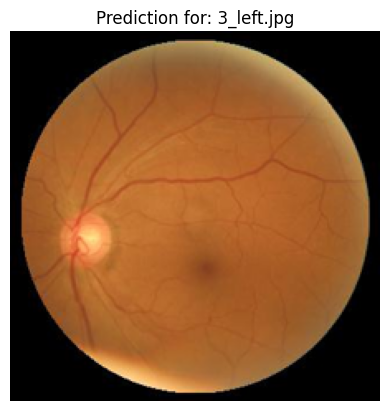

Prediction Probabilities:
Normal (N): 96.47%
Diabetes (D): 2.92%

🩺 Detected Disease(s): Normal (N)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


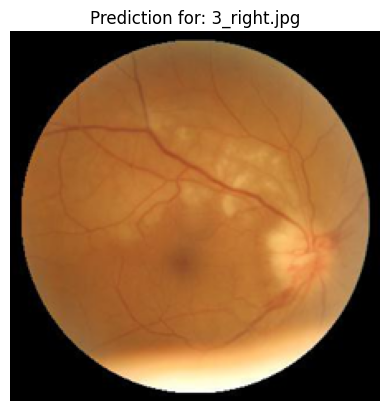

Prediction Probabilities:
Normal (N): 99.76%
Diabetes (D): 0.20%

🩺 Detected Disease(s): Normal (N)


In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import os

# Define the class labels
class_labels = ['Normal (N)', 'Diabetes (D)', 'Glaucoma (G)', 'Cataract (C)',
                'Age-related Macular Degeneration (A)', 'Hypertension (H)',
                'Pathological Myopia (M)', 'Other diseases/abnormalities (O)']

# Load the trained model
model = load_model("my_model.keras")

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = Image.open(img_path).convert("RGB")
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img

# Replace these with your actual test image paths
image_paths = [
    "ODIR-5K/ODIR-5K/Training_Images/3_left.jpg",
    "ODIR-5K/ODIR-5K/Training_Images/3_right.jpg"
]

# Set a threshold to consider disease "present"
threshold = 0.5

for path in image_paths:
    processed_img, original_img = preprocess_image(path)

    prediction = model.predict(processed_img)[0]

    plt.imshow(original_img)
    plt.axis('off')
    plt.title(f"Prediction for: {os.path.basename(path)}")
    plt.show()

    print("Prediction Probabilities:")
    present_diseases = []
    for i, prob in enumerate(prediction):
        print(f"{class_labels[i]}: {prob*100:.2f}%")
        if prob >= threshold:
            present_diseases.append(class_labels[i])

    if present_diseases:
        print(f"\n🩺 Detected Disease(s): {', '.join(present_diseases)}")
    else:
        print("\n✅ No significant disease detected (all below threshold).")
    print("="*50)


In [22]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 512)  │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,697,160 (117.10 MB)

 Trainable params: 10,232,386 (39.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,464,774 (78.07 MB)

In [ ]:
# Cell 1: Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Cell 2: Define mish activation
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

# Register the custom activation
from tensorflow.keras.utils import get_custom_objects
get_custom_objects().update({'mish': mish})

# Cell 3: Load the model
model_path = "inceptionv3.h5"  # Replace with your actual model path
model = load_model(model_path)

# Cell 4: Define the class labels
classes = [
    'Normal (N)', 
    'Diabetes (D)', 
    'Glaucoma (G)', 
    'Cataract (C)', 
    'Age-related Macular Degeneration (A)', 
    'Hypertension (H)', 
    'Pathological Myopia (M)', 
    'Other diseases/abnormalities (O)'
]

# Cell 5: Manually specify the image path
img_path = "ODIR-5K/ODIR-5K/Training_Images/0_left.jpg"  # Replace with your image path (e.g., "C:/Users/you/Desktop/test.jpg")

# Cell 6: Preprocess the image
img = Image.open(img_path).convert("RGB")
img = img.resize((224, 224))  # Change size if your model uses different input dimensions

plt.imshow(img)
plt.title("Input Image")
plt.axis("off")
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize if needed

# Cell 7: Make prediction
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)
predicted_class = classes[predicted_index]
confidence = predictions[0][predicted_index]

# Cell 8: Output result
print(f"✅ Predicted Class: {predicted_class}")
print(f"📊 Confidence Score: {confidence:.2f}")


In [ ]:
model = load_model("Custom_CNN.h5")  # Your model file
